In [22]:
import numpy as np
import stats
import pandas as pd

In [24]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.precision',3)
pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',2000)

In [25]:
import seaborn as sn 
import matplotlib.pyplot as plt
import matplotlib.style as psl 
from mpl_toolkits.axes_grid1 import host_subplot
# 样式复制 ggplot
psl.use('ggplot') 
# 刻度方向配置
plt.rcParams['xtick.direction'] = 'out' 
plt.rcParams['ytick.direction'] = 'inout' 
# 字体配置--支持中文
plt.rcParams['font.sans-serif']=['SimHei','YouYuan']
# 显示负号
plt.rcParams['axes.unicode_minus']=False # 负数

plt.rcParams['figure.figsize'] = (8.0, 4.0) # 设置figure_size尺寸
plt.rcParams['savefig.dpi'] = 300 # 保存的图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style
plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style

# 概率分布

## 离散分布

### 二项分布 X~B(n,p)

$$ F(X)={n \choose k}p^k(1-p)^{n-k}$$

- 结果只有2种情况，正或负
- n次试样中，有k次正样本被选中
- 正样本发生的概率为p  0<=p<=1
- E(X)=np  D(X)=np(1-p)

<AxesSubplot:xlabel='trail', ylabel='rate'>

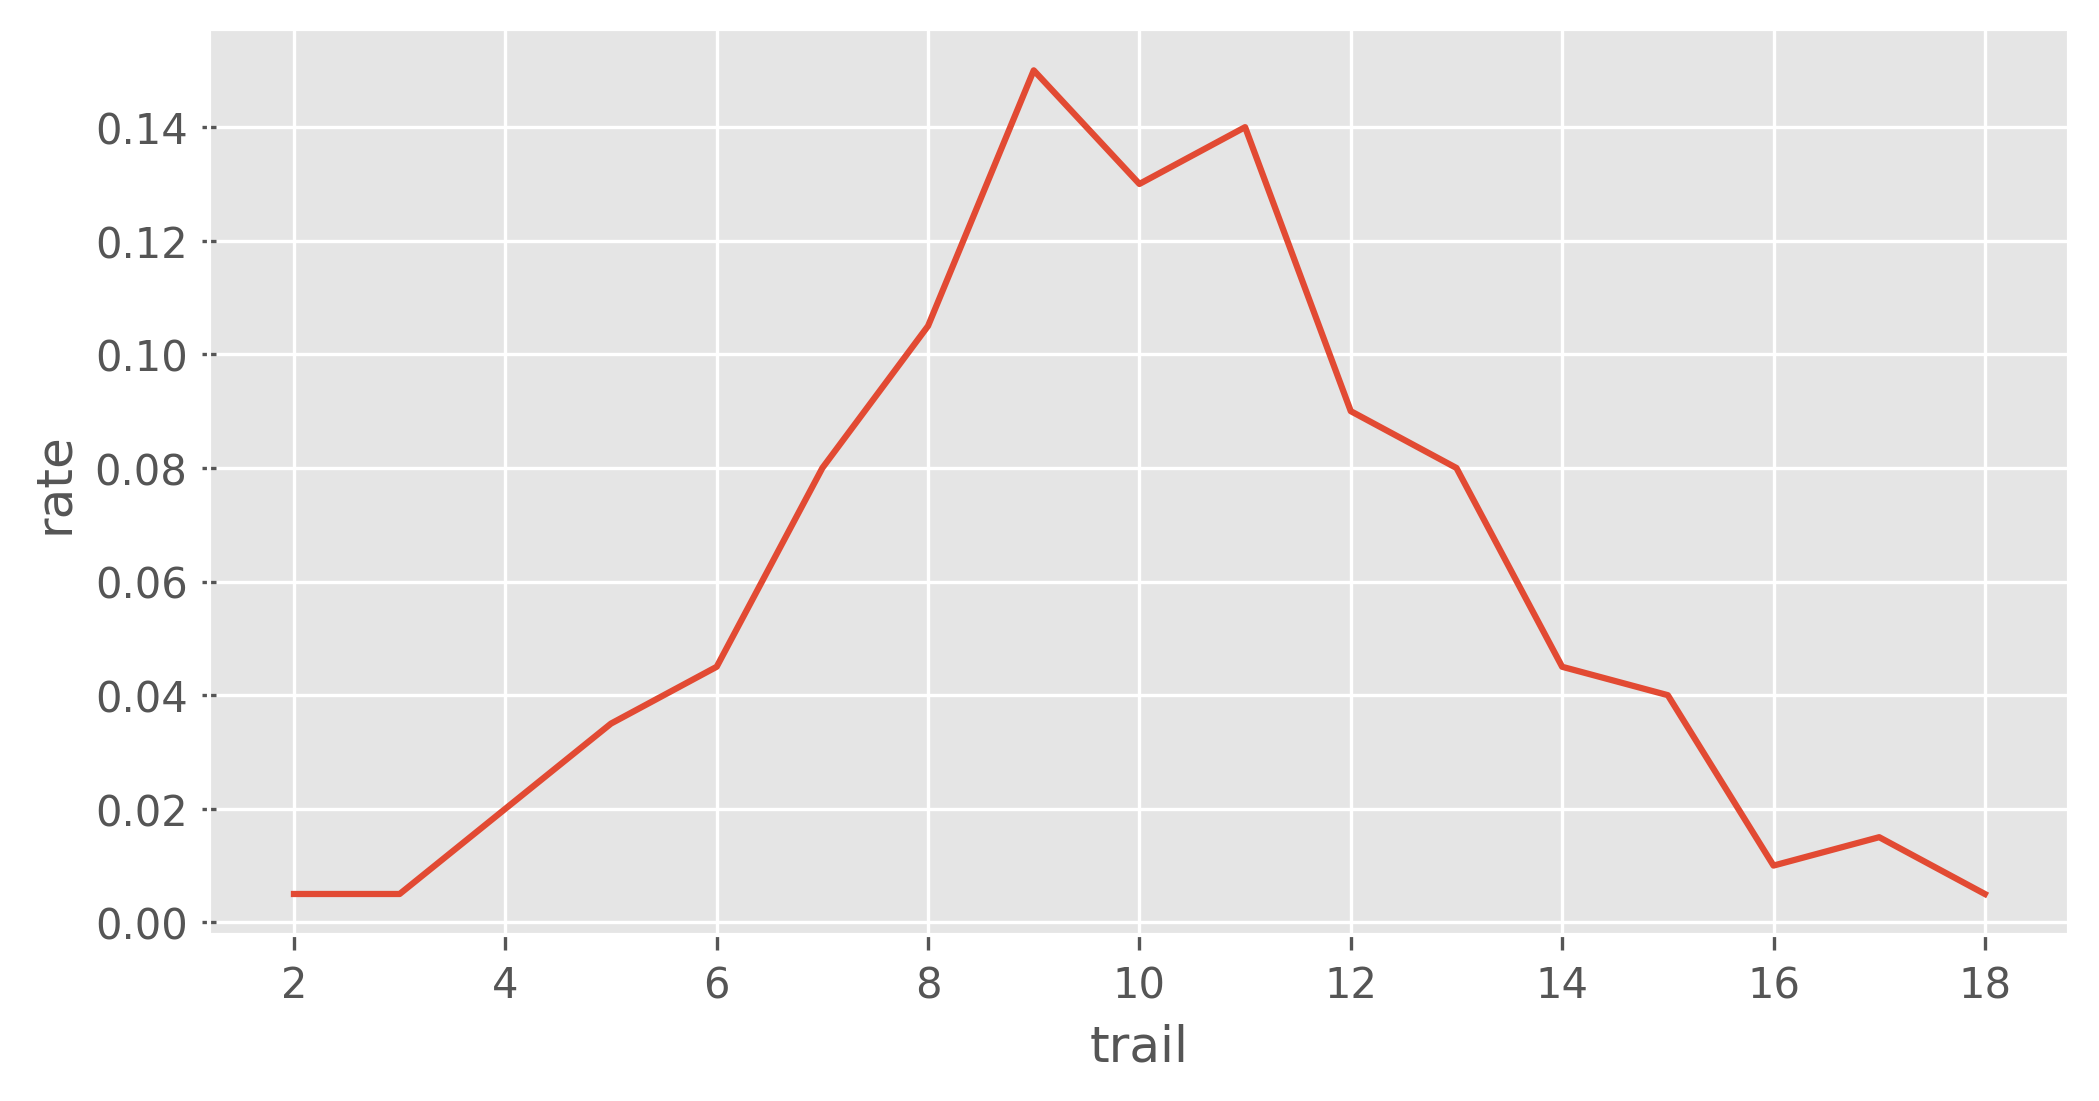

In [34]:
# 100枚硬币，向上的概率假设为0.1，进行200次试验，
# 1次试验指100枚硬币都做抛的操作
# 1次试验中硬币向上的硬币个数，取值范围是[0,100]
a=np.random.binomial(100,0.1,200)
a=pd.DataFrame(a,columns=['trail'])
# 200次试验中，出现trail 的概率是 trail / 200
# 对应的公式中，n=200,k=x轴的数据，即trail 值，概率=y轴的值
a = a.groupby('trail').size().reset_index().rename(columns={0:'cnt'})
a['rate']=np.round(a['cnt']/200,3)
sn.lineplot(x='trail',y='rate',data=a)

In [7]:
# 概率质量函数


array([51, 59, 55, 47, 45, 52, 51, 50, 50, 49, 55, 44, 44, 48, 46, 56, 47,
       48, 52, 50, 53, 51, 46, 48, 53, 51, 50, 51, 55, 48, 46, 59, 65, 46,
       62, 51, 55, 54, 51, 36, 44, 50, 54, 52, 49, 45, 49, 45, 39, 59, 40,
       48, 57, 54, 43, 47, 46, 57, 55, 45, 60, 54, 48, 61, 49, 47, 40, 45,
       40, 54, 52, 51, 48, 54, 47, 55, 50, 54, 51, 53, 51, 54, 44, 45, 46,
       49, 49, 56, 58, 60, 49, 53, 50, 51, 54, 46, 54, 48, 46, 44])

# 参数估计

- 变量分为单变量或多变量，多变量可看作向量研究
- 变量维度可为离散变量或连续型变量
- 变量的分布多种多样，如果变量服从某一种分布，则该分布函数中的参数说的是总体样本的参数
- 参数估计即为使用部分样本估计总体分布的参数
- 比如正态分布中的均值和方差，即为参数

# 样本量估计

## 指标为分类

计算公式
$$ n=\frac {(1+\frac 1k)(\mu_{\alpha} + \mu_{\beta})^2p(1-p)}{\delta^2} $$ 

$$
p=\frac {p_1+kp_2}{1+k} ,p_1 对照组概率,p_2 实验组概率 \\ 
k=对照组数/实验组数,如果两组样本比例一致，则k=1 \\
\delta = (p_2-p_1) \\ 
\mu_{\alpha} , u值表，根据单侧双侧进行查询值 \\
\mu_{\beta} , u值表，根据单侧双侧进行查询值 
$$

## 指标为均值

计算公式
$$ n=\frac {2(\mu_{\alpha} + \mu_{\beta})^2(1+\frac 1k)\sigma^2}{\delta^2} $$

$$
\sigma 总体方差，可用样本方差代替 \sigma^2={(s_1^2 + s_2^2) \over 2} \\
s_1 对照组标准差，s_2 实验组标准差 \\
\delta=实验组均值-对照组均值的绝对值
$$